In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Loading the Image

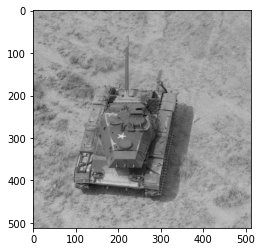

In [2]:
img = cv2.imread('../../tank_img.tiff', 0)
plt.imsave('tank.png', img, cmap='gray')
plt.imshow(img, cmap='gray');

### Custom Class for First Order Derivative filter

In [3]:
class FirstOrderDerivative_PrewittFilter(object):
    ''' 
    Class for First Order Derivative Filter 
    Type of First Order Derivative Filter used: Prewitt's Operator
    '''
    def __init__(self) -> None:
        ''' Prewitt's Gradient Filters '''
        self.Gx = np.array([[-1,  0,  1], 
                            [-1,  0,  1],
                            [-1,  0,  1]])
        self.Gy = np.array([[-1, -1, -1], 
                            [ 0,  0,  0],
                            [+1, +1, +1]])
    
    def sharpen(self, image: np.ndarray) -> np.ndarray:
        '''
        Sharpen the Image using First Order Derivative Filter.
        Using a Window of size 3x3, as given by filter mask. 
        '''
        filter_X = image.copy()
        filter_Y = image.copy()
        
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                row_start, row_end = max(0, i - 1), i + 2
                col_start, col_end = max(0, j - 1), j + 2 
                
                GX = self.Gx[int(i==0) : 3 - int(i==image.shape[0]-1), int(j==0) : 3 - int(j==image.shape[1]-1)]
                GY = self.Gy[int(i==0) : 3 - int(i==image.shape[0]-1), int(j==0) : 3 - int(j==image.shape[1]-1)]
                
                filter_X[i, j] = np.sum(image[row_start:row_end, col_start:col_end] * GX)
                filter_Y[i, j] = np.sum(image[row_start:row_end, col_start:col_end] * GY)
        
        return filter_X, filter_Y

### Sharpening using 1st-Order Derivative Filter (using Prewitt's Gradient)


X and Y Gradients

In [4]:
prewitt_X, prewitt_Y = FirstOrderDerivative_PrewittFilter().sharpen(img)

plt.imsave('prewitt_X.png', prewitt_X, cmap='gray')
plt.imsave('prewitt_Y.png', prewitt_Y, cmap='gray')

Edge Mask

In [ ]:
prewitt_edge_mask = np.sqrt(np.square(prewitt_X) + np.square(prewitt_Y))
prewitt_edge_mask = prewitt_edge_mask.astype(np.uint8)

plt.imsave('prewitt_edge_mask.png', prewitt_edge_mask, cmap='gray')

Sharp Image

In [ ]:
prewitt_sharp_img = img + prewitt_edge_mask

plt.imsave('prewitt_sharp_image.png', prewitt_sharp_img,     cmap='gray')